<a href="https://colab.research.google.com/github/Vrushti709/Git-demo/blob/main/sales_data_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_csv("/content/Sample - Superstore.csv", encoding='latin-1')

In [6]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

In [7]:
print("Total Sales:", round(df['Sales'].sum(), 2))
print("Total Profit:", round(df['Profit'].sum(), 2))
print("Unique Orders:", df['Order ID'].nunique())


Total Sales: 2297200.86
Total Profit: 286397.02
Unique Orders: 5009


/tmp/ipython-input-2987303466.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')


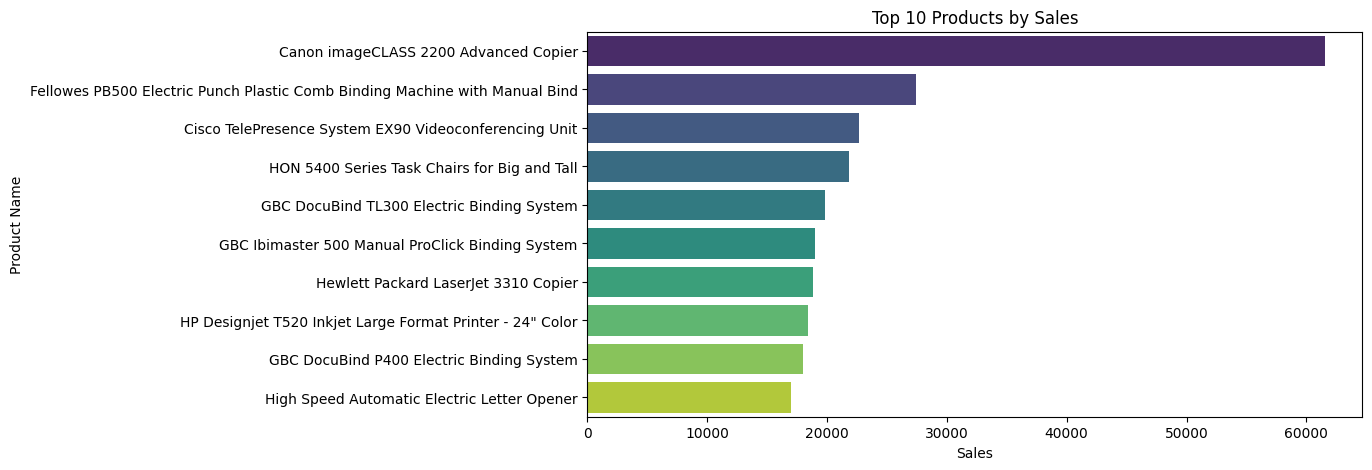

In [8]:
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.title("Top 10 Products by Sales")
plt.xlabel("Sales")
plt.ylabel("Product Name")
plt.show()

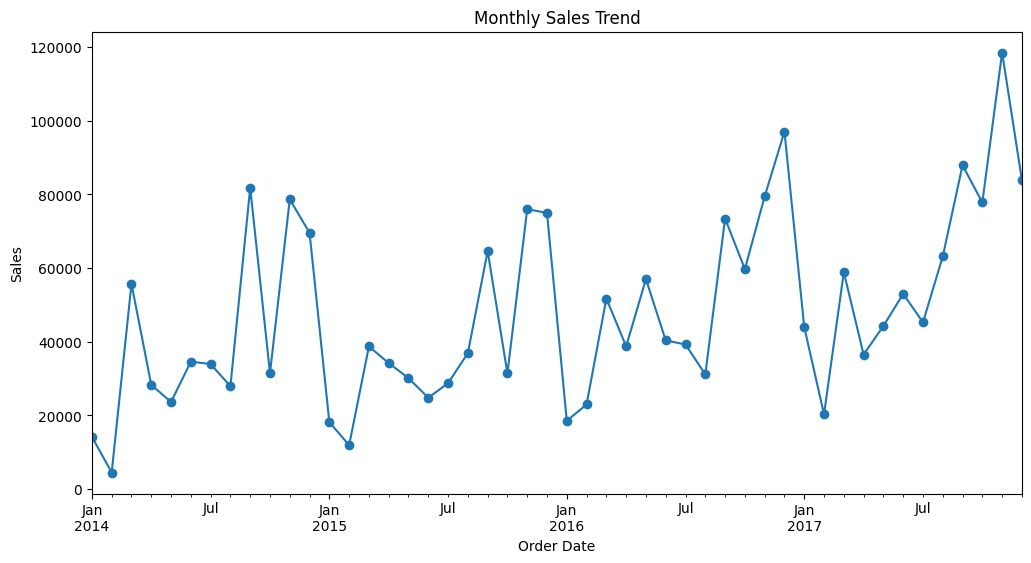

In [9]:
monthly_sales = df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum()
plt.figure(figsize=(12,6))
monthly_sales.plot(marker='o', title="Monthly Sales Trend")
plt.ylabel("Sales")
plt.show()


/tmp/ipython-input-2766990715.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_sales.index, y=region_sales.values, palette='coolwarm')


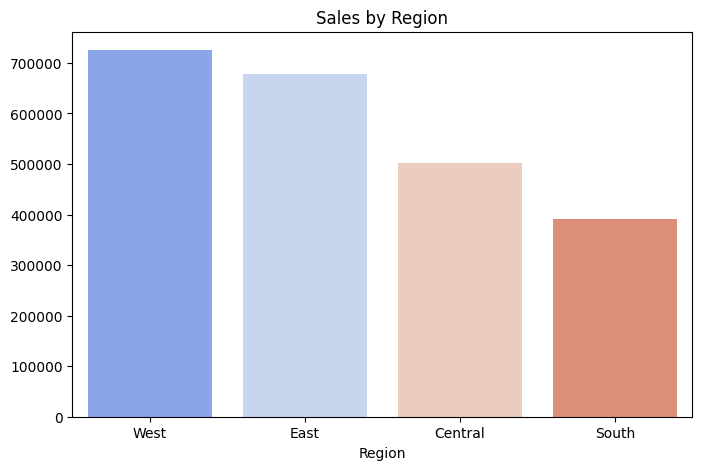

In [10]:
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=region_sales.index, y=region_sales.values, palette='coolwarm')
plt.title("Sales by Region")
plt.show()

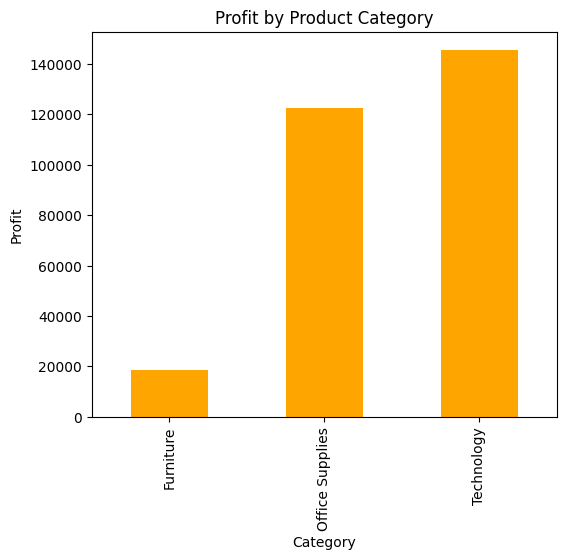

In [11]:
category_profit = df.groupby('Category')['Profit'].sum()
plt.figure(figsize=(6,5))
category_profit.plot(kind='bar', color='orange', title='Profit by Product Category')
plt.ylabel("Profit")
plt.show()